In [1]:
# Import libs
from bs4 import BeautifulSoup
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import requests
import re

In [4]:
# Load corpus.csv
corpus = pd.read_csv('corpus.csv', sep=';')
print(corpus.shape)
corpus.dropna(inplace=True)
print(corpus.shape)
corpus.sample(10)

(2572, 8)
(2212, 8)


,year,date,category,title,link,langs,text,words
2187,2002,2002-10-10,PRESS RELEASE,Mr. de Beaufort Wijnholds appointed as permane...,https://www.ecb.europa.eu/press/pr/date/2002/h...,English,The Executive Board of the European Central Ba...,131
1171,2011,2011-06-29,PRESS RELEASE,Prolongation of US dollar liquidity-providing ...,https://www.ecb.europa.eu/press/pr/date/2011/h...,English,The Governing Council of the European Central ...,167
2296,2001,2001-07-20,PRESS RELEASE,Publication of two studies related to the euro...,https://www.ecb.europa.eu/press/pr/date/2001/h...,English,In the context of the regular monitoring activ...,174
2518,1998,1998-11-03,PRESS RELEASE,Policy statement on euro payment and settlemen...,https://www.ecb.europa.eu/press/pr/date/1998/h...,English,"As is the case with every central bank, the EC...",307
1020,2012,2012-10-30,PRESS RELEASE,ECB and Bank of Russia sign a Memorandum of Un...,https://www.ecb.europa.eu/press/pr/date/2012/h...,English,"Mario Draghi, President of the European Centra...",183
1303,2010,2010-06-10,PRESS RELEASE,ECB announces details of longer-term refinanci...,https://www.ecb.europa.eu/press/pr/date/2010/h...,English,The Governing Council of the European Central ...,40
2111,2003,2003-06-26,PRESS RELEASE,Oversight standards for euro retail payment sy...,https://www.ecb.europa.eu/press/pr/date/2003/h...,"Português, Dansk, Nederlands, English, Svenska...",In carrying out its statutory task of promotin...,514
697,2015,2015-01-01,PRESS RELEASE,Lithuania joins the euro area,https://www.ecb.europa.eu/press/pr/date/2015/h...,"Dansk, Nederlands, Čeština, Magyar, Svenska, H...",EMBARGOTransmission embargo until 12 CET on Th...,441
1923,2005,2005-01-13,PRESS RELEASE,Biannual information on the counterfeiting of ...,https://www.ecb.europa.eu/press/pr/date/2005/h...,"Dansk, Nederlands, Čeština, Magyar, Svenska, P...","In the second half of 2004, a total of 287,000...",291
1750,2006,2006-10-20,PRESS RELEASE,Update of the assessment of securities settlem...,https://www.ecb.europa.eu/press/pr/date/2006/h...,English,The Governing Council of the European Central ...,134


In [5]:
in_greek = corpus[corpus['langs'].str.contains('λληνικά')]
in_greek.shape

(679, 8)

In [6]:
to_translate = pd.DataFrame(corpus.loc[in_greek.index, corpus.columns])
to_translate.shape

(679, 8)

In [7]:
to_translate.sample(10)

,year,date,category,title,link,langs,text,words
1050,2012,2012-08-02,MONETARY POLICY DECISION,Monetary policy decisions,https://www.ecb.europa.eu/press/pr/date/2012/h...,"Dansk, Nederlands, Čeština, Magyar, Svenska, P...",At today’s meeting the Governing Council of th...,64
350,2019,2019-03-06,PRESS RELEASE,ECB adopts opinion on appointment of new Execu...,https://www.ecb.europa.eu/press/pr/date/2019/h...,"Dansk, Nederlands, Čeština, Magyar, Svenska, H...",6 March 2019 Governing Council has no objecti...,198
1648,2007,2007-07-10,PRESS RELEASE,Communiqué of the European Central Bank and th...,https://www.ecb.europa.eu/press/pr/date/2007/h...,"Eλληνικά, English",Following the determination of the euro conver...,72
2416,2000,2000-01-20,MONETARY POLICY DECISION,Monetary policy decisions,https://www.ecb.europa.eu/press/pr/date/2000/h...,"Português, Dansk, Nederlands, English, Svenska...",At today's meeting the Governing Council of th...,115
1840,2005,2005-11-03,MONETARY POLICY DECISION,Monetary policy decisions,https://www.ecb.europa.eu/press/pr/date/2005/h...,"Dansk, Nederlands, Čeština, Magyar, Svenska, P...",At today’s meeting the Governing Council of th...,64
2230,2002,2002-03-05,PRESS RELEASE,European Central Bank buys Grossmarkt site,https://www.ecb.europa.eu/press/pr/date/2002/h...,"Português, Dansk, Nederlands, English, Svenska...","On 5 March 2002, the European Central Bank (EC...",464
552,2016,2016-06-24,PRESS RELEASE,ECB is closely monitoring financial markets,https://www.ecb.europa.eu/press/pr/date/2016/h...,"Dansk, Nederlands, Čeština, Magyar, Svenska, H...",European Central Bank is closely monitoring fi...,129
829,2014,2014-02-03,PRESS RELEASE,"ECB makes progress with asset quality review, ...",https://www.ecb.europa.eu/press/pr/date/2014/h...,"Português, Slovenščina, Nederlands, Eesti keel...",EMBARGOTransmission embargo until 1 p.m. CET o...,768
2277,2001,2001-09-17,MONETARY POLICY DECISION,Monetary policy decisions,https://www.ecb.europa.eu/press/pr/date/2001/h...,"Português, Dansk, Nederlands, English, Svenska...","Following the terrorist attacks on the US, unc...",153
1079,2012,2012-05-03,MONETARY POLICY DECISION,Monetary policy decisions,https://www.ecb.europa.eu/press/pr/date/2012/h...,"Dansk, Nederlands, Čeština, Magyar, Svenska, P...","At today’s meeting, which was held in Barcelon...",69


In [27]:
corpus_el = pd.DataFrame()
links_en = to_translate['link'].values

In [28]:
for link in links_en:
    news_item_link = link

    link = re.sub('en.html', 'el.html', link)
    html = requests.get(link).text
    soup = BeautifulSoup(html, 'lxml')

    try:
        news_item_text = soup.find('main').findAll('div', class_='section')
    except AttributeError:
        news_item_text = ''

    news_item_df = pd.DataFrame({
        'title_el': soup.find('h1').text,
        'link': news_item_link,
        'text_el': ' '.join([text.text for text in news_item_text]).strip()
    }, index=[2])
    corpus_el = pd.concat([corpus_el, news_item_df], axis=0, ignore_index=True)

corpus_el.head()

,title_el,link,text_el
0,Αποφάσεις νομισματικής πολιτικής,https://www.ecb.europa.eu/press/pr/date/2022/h...,14 Απριλίου 2022Η επίθεση της Ρωσίας στην Ουκρ...
1,Αποφάσεις νομισματικής πολιτικής,https://www.ecb.europa.eu/press/pr/date/2022/h...,10 Μαρτίου 2022\nΗ εισβολή της Ρωσίας στην Ουκ...
2,Φιλανθρωπική συναυλία για την Ουκρανία στην Κρ...,https://www.ecb.europa.eu/press/pr/date/2022/h...,2 Μαρτίου 2022\nΗ Ευρωπαϊκή Κεντρική Τράπεζα (...
3,Οικονομικές καταστάσεις της ΕΚΤ για το 2021,https://www.ecb.europa.eu/press/pr/date/2022/h...,17 Φεβρουαρίου 2022\n\nΤα κέρδη της ΕΚΤ ανήλθα...
4,Ετήσιοι λογαριασμοί της ΕΚΤ 2021,https://www.ecb.europa.eu/pub/annual/annual-ac...,Βασικά στοιχεία\n\n1 Έκθεση διαχείρισης\n1.1 Σ...


In [29]:
corpus_el.shape

(679, 3)

In [30]:
corpus_el['text_el'] = corpus_el['text_el'].str.replace('\n', ' ')

In [31]:
corpus_el.isnull().sum()

title_el    0
link        0
text_el     0
dtype: int64

In [32]:
corpus_el = pd.merge(in_greek, corpus_el, left_on='link', right_on='link', how='outer')
corpus_el.sample(20)

,year,date,category,title,link,langs,text,words,title_el,text_el
161,2014,2014-08-01,PRESS RELEASE,Single Euro Payments Area (SEPA) reaches major...,https://www.ecb.europa.eu/press/pr/date/2014/h...,"Dansk, Nederlands, Čeština, Magyar, Svenska, H...",Over 2 billion credit transfers and direct deb...,331,Ο SEPA επιτυγχάνει σημαντικό ορόσημο για τις π...,EMBARGOΑπαγόρευση δημοσίευσης πριν από τις 10....
570,2002,2002-07-31,PRESS RELEASE,Biannual information on the counterfeiting of ...,https://www.ecb.europa.eu/press/pr/date/2002/h...,"Português, Dansk, Nederlands, English, Svenska...",This press release is the first in a series of...,463,ΕΞΑΜΗΝΙΑΙΟ ΕΝΗΜΕΡΩΤΙΚΟ ΔΕΛΤΙΟ ΣΧΕΤΙΚΑ ΜΕ ΤΗΝ Π...,Με το παρόν δελτίο Τύπου εγκαινιάζεται μια σει...
69,2018,2018-09-17,PRESS RELEASE,ECB unveils new €100 and €200 banknotes,https://www.ecb.europa.eu/press/pr/date/2018/h...,"Dansk, Nederlands, Čeština, Magyar, Svenska, H...",17 September 2018 New €100 and €200 banknotes...,462,Επίσημη παρουσίαση των νέων τραπεζογραμματίων ...,17 Σεπτεμβρίου 2018 Τα νέα τραπεζογραμμάτια τ...
131,2015,2015-06-22,PRESS RELEASE,Roadmap for the future of the Economic and Mon...,https://www.ecb.europa.eu/press/pr/date/2015/h...,"Dansk, Nederlands, Čeština, Magyar, Svenska, H...",Presidents of five EU institutions publish rep...,428,Roadmap for the future of the Economic and Mon...,Presidents of five EU institutions publish rep...
554,2003,2003-02-06,MONETARY POLICY DECISION,Monetary policy decisions,https://www.ecb.europa.eu/press/pr/date/2003/h...,"Português, Dansk, Nederlands, English, Svenska...",At today's meeting the Governing Council of th...,64,ΑΠΟΦΑΣΕΙΣ ΝΟΜΙΣΜΑΤΙΚΗΣ ΠΟΛΙΤΙΚΗΣ,"Κατά τη σημερινή του συνεδρίαση, το Διοικητικό..."
573,2002,2002-06-20,PRESS RELEASE,Schedules for the meetings of the Governing Co...,https://www.ecb.europa.eu/press/pr/date/2002/h...,"Português, Dansk, Nederlands, English, Svenska...",The Governing Council has agreed that in 2003 ...,410,ΠΡΟΓΡΑΜΜΑ ΤΩΝ ΣΥΝΕΔΡΙΑΣΕΩΝ ΤΟΥ ΔΙΟΙΚΗΤΙΚΟΥ ΣΥΜ...,"Το Διοικητικό Συμβούλιο συμφώνησε ότι, το 2003..."
228,2013,2013-02-07,MONETARY POLICY DECISION,Monetary policy decisions,https://www.ecb.europa.eu/press/pr/date/2013/h...,"Dansk, Nederlands, Čeština, Magyar, Svenska, P...",At today’s meeting the Governing Council of th...,64,Αποφάσεις νομισματικής πολιτικής,Κατά τη σημερινή του συνεδρίαση το Διοικητικό ...
285,2011,2011-01-17,PRESS RELEASE,biannual information on euro banknote counterf...,https://www.ecb.europa.eu/press/pr/date/2011/h...,"Dansk, Nederlands, Čeština, Magyar, Svenska, P...","In the second half of 2010 a total of 364,102 ...",367,Εξαμηνιαίο ενημερωτικό δελτίο σχετικά με την π...,Το δεύτερο εξάμηνο του 2010 αποσύρθηκαν από τη...
645,2000,2000-05-25,MONETARY POLICY DECISION,Monetary policy decisions,https://www.ecb.europa.eu/press/pr/date/2000/h...,"Português, Dansk, Nederlands, English, Svenska...",At today's meeting (which was held in the form...,45,Αποφάσεις νομισματικής πολιτικής,Κατά τη σημερινή του συνεδρίαση (η οποία πραγμ...
584,2002,2002-03-05,PRESS RELEASE,European Central Bank buys Grossmarkt site,https://www.ecb.europa.eu/press/pr/date/2002/h...,"Português, Dansk, Nederlands, English, Svenska...","On 5 March 2002, the European Central Bank (EC...",464,Η ΕΥΡΩΠΑΪΚΗ ΚΕΝΤΡΙΚΗ ΤΡΑΠΕΖΑ ΑΓΟΡΑΖΕ ΤΟ ΧΩΡΟΤΗ...,"Στις 5 Μαρτίου 2002, η Ευρωπαϊκή Κεντρική Τράπ..."


In [33]:
corpus_el[corpus_el['link'].duplicated(keep=False)]

,year,date,category,title,link,langs,text,words,title_el,text_el


In [34]:
print(corpus_el.shape)
corpus_el.drop_duplicates(keep='first', inplace=True)
print(corpus_el.shape)

(679, 10)
(679, 10)


In [35]:
corpus_el.drop(columns=['langs'], inplace=True)

In [36]:
corpus_el.rename(columns={'title': 'title_en', 'link': 'link_en', 'text': 'text_en', 'words': 'length_en'}, inplace=True)

corpus_el['length_el'] = corpus_el['text_el'].apply(lambda x: len(x.split()))
corpus_el['link_el'] = corpus_el['link_en'].apply(lambda x: re.sub('en.html', 'el.html', x))

corpus_el.reindex(columns=['year', 'date', 'category', 'title_en', 'text_en', 'length_en', 'title_el', 'text_el', 'length_el', 'link_en', 'link_el'])
corpus_el.sort_values(by='date', ascending=False, inplace=True)

corpus_el.head()

,year,date,category,title_en,link_en,text_en,length_en,title_el,text_el,length_el,link_el
0,2022,2022-04-14,MONETARY POLICY DECISION,Monetary policy decisions,https://www.ecb.europa.eu/press/pr/date/2022/h...,14 April 2022Russia’s aggression in Ukraine is...,899,Αποφάσεις νομισματικής πολιτικής,14 Απριλίου 2022Η επίθεση της Ρωσίας στην Ουκρ...,1070,https://www.ecb.europa.eu/press/pr/date/2022/h...
1,2022,2022-03-10,MONETARY POLICY DECISION,Monetary policy decisions,https://www.ecb.europa.eu/press/pr/date/2022/h...,10 March 2022 The Russian invasion of Ukraine ...,977,Αποφάσεις νομισματικής πολιτικής,10 Μαρτίου 2022 Η εισβολή της Ρωσίας στην Ουκρ...,1200,https://www.ecb.europa.eu/press/pr/date/2022/h...
2,2022,2022-03-02,PRESS RELEASE,Charity concert for Ukraine at Berlin State Opera,https://www.ecb.europa.eu/press/pr/date/2022/h...,2 March 2022 The European Central Bank (ECB) a...,227,Φιλανθρωπική συναυλία για την Ουκρανία στην Κρ...,2 Μαρτίου 2022 Η Ευρωπαϊκή Κεντρική Τράπεζα (Ε...,257,https://www.ecb.europa.eu/press/pr/date/2022/h...
3,2022,2022-02-17,PRESS RELEASE,Financial statements of the ECB for 2021,https://www.ecb.europa.eu/press/pr/date/2022/h...,17 February 2022 ECB profit €0.2 billion (202...,713,Οικονομικές καταστάσεις της ΕΚΤ για το 2021,17 Φεβρουαρίου 2022 Τα κέρδη της ΕΚΤ ανήλθαν ...,849,https://www.ecb.europa.eu/press/pr/date/2022/h...
4,2022,2022-02-17,ANNUAL ACCOUNTS,Annual Accounts 2021,https://www.ecb.europa.eu/pub/annual/annual-ac...,Key figures 1 Management report 1.1 Purpose o...,16183,Ετήσιοι λογαριασμοί της ΕΚΤ 2021,Βασικά στοιχεία 1 Έκθεση διαχείρισης 1.1 Σκοπ...,17353,https://www.ecb.europa.eu/pub/annual/annual-ac...


In [37]:
print('Total words:', f"{corpus_el['length_el'].values.sum():,}")
print('Avg word length:', round(corpus_el['length_el'].values.mean(), 1))

Total words: 243,803
Avg word length: 359.1


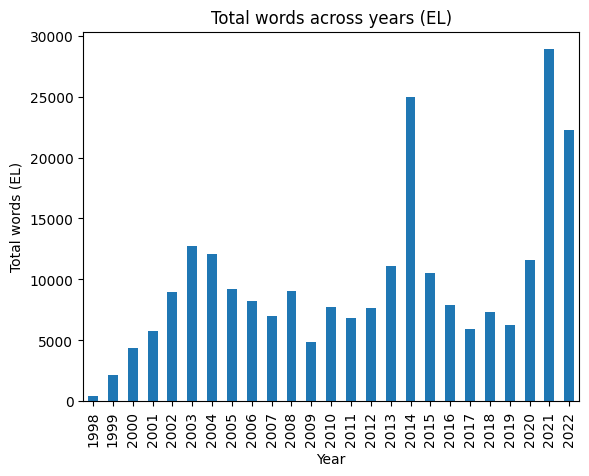

In [40]:
# Plot word length across years
corpus_el.groupby('year')['length_el'].sum().plot(kind='bar')
plt.title('Total words across years (EL)')
plt.xlabel('Year')
plt.ylabel('Total words (EL)')
plt.show()

## Find and fix errors

In [2]:
import pandas as pd

In [3]:
corpus_el = pd.read_csv('corpus_el.csv', sep=';')

In [5]:
corpus_el[corpus_el.duplicated(keep=False)]

,year,date,category,title_en,link_en,text_en,length_en,title_el,text_el,length_el,link_el


In [9]:
corpus_el[corpus_el.isnull().any(axis=1)]

,year,date,category,title_en,link_en,text_en,length_en,title_el,text_el,length_el,link_el
593,2001,2001-12-21,PRESS RELEASE,New organisation chart of the European Central...,https://www.ecb.europa.eu/press/pr/date/2001/h...,In the light of experience gathered during the...,118,ECB,NaN,0,https://www.ecb.europa.eu/press/pr/date/2001/h...


In [11]:
corpus_el.drop(593, axis=0, inplace=True)

In [25]:
not_greek = corpus_el[~corpus_el['text_el'].str.contains(r'α', regex=True)]
not_greek.shape

(10, 11)

In [26]:
print(corpus_el.shape)
corpus_el = corpus_el.drop(not_greek.index)
print(corpus_el.shape)

(678, 11)
(668, 11)


In [27]:
corpus_el.to_csv('corpus_el.csv', sep=';', index=False)